### 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### 2. Load & Preprocess CIFAR-10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

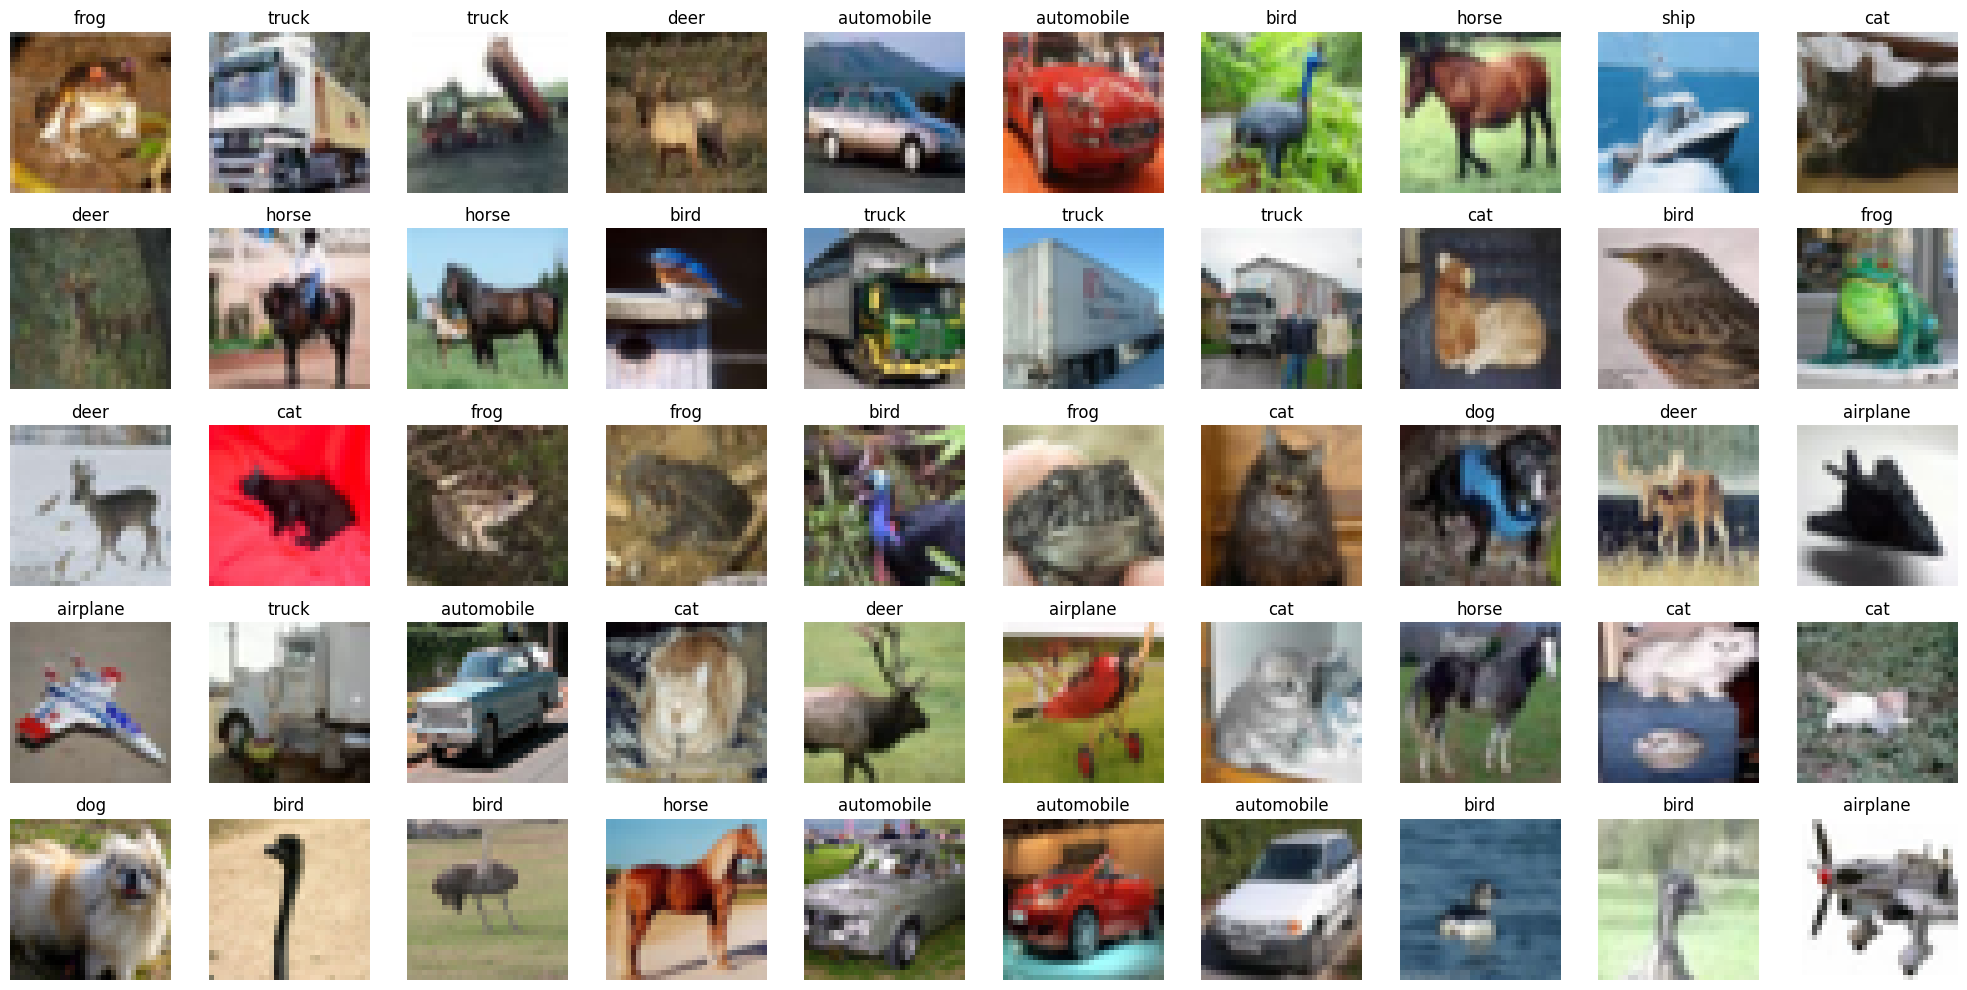

In [ ]:
def show_dataset_grid(x, y, class_names, rows=5, cols=10):
    plt.figure(figsize=(2 * cols, 2 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        img = x[i]
        if img.max() <= 1.0:
            img = (img * 255).astype("uint8")  
        plt.imshow(img)
        plt.title(class_names[y[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
y_train = y_train.flatten()
show_dataset_grid(x_train, y_train, class_names, rows=5, cols=10)


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### 3. Define CNN Model

In [ ]:
def create_cnn_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax')) 
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


### 4. Train Model with Hyperparameters

In [ ]:
optimizer = Adam(learning_rate=0.001) 
dropout_rate = 0.3

model = create_cnn_model(optimizer=optimizer, dropout_rate=dropout_rate)

history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64,
                    validation_split=0.2, verbose=1)

C:\Users\Priyanka\anaconda3\envs\qiskit-stable\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.3053 - loss: 1.8895 - val_accuracy: 0.5081 - val_loss: 1.3831
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4906 - loss: 1.4084 - val_accuracy: 0.5577 - val_loss: 1.2637
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5541 - loss: 1.2545 - val_accuracy: 0.5952 - val_loss: 1.1500
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5915 - loss: 1.1546 - val_accuracy: 0.6311 - val_loss: 1.0517
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6197 - loss: 1.0724 - val_accuracy: 0.6368 - val_loss: 1.0299


### 5. Evaluate the Model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6439 - loss: 1.0143

Test Accuracy: 64.00%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


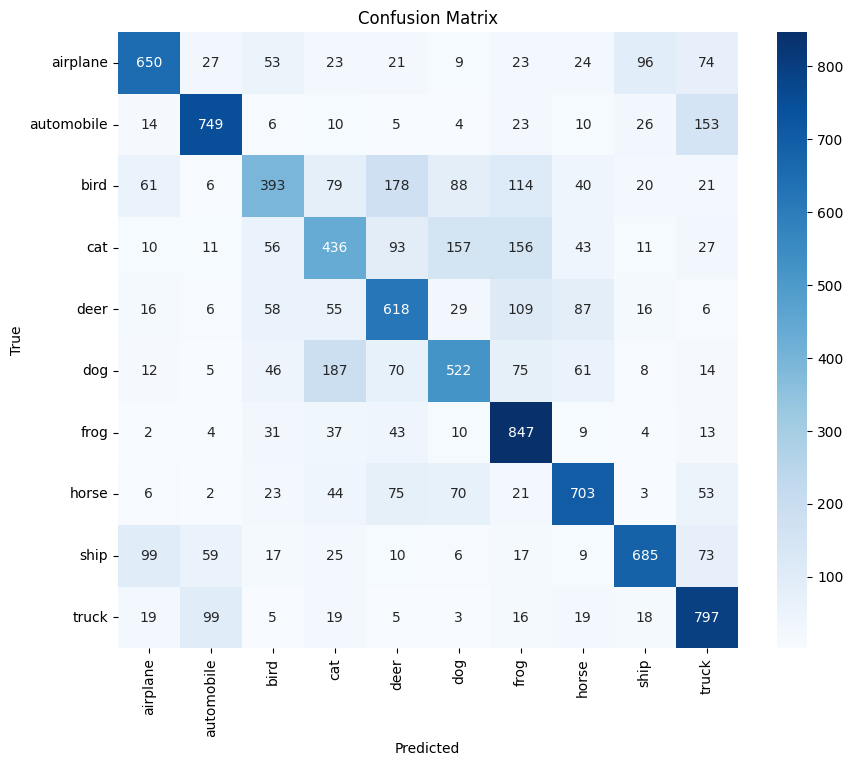

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.73      0.65      0.69      1000
  automobile       0.77      0.75      0.76      1000
        bird       0.57      0.39      0.47      1000
         cat       0.48      0.44      0.46      1000
        deer       0.55      0.62      0.58      1000
         dog       0.58      0.52      0.55      1000
        frog       0.60      0.85      0.71      1000
       horse       0.70      0.70      0.70      1000
        ship       0.77      0.69      0.73      1000
       truck       0.65      0.80      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



### 6. Plot Training & Validation Accuracy/Loss

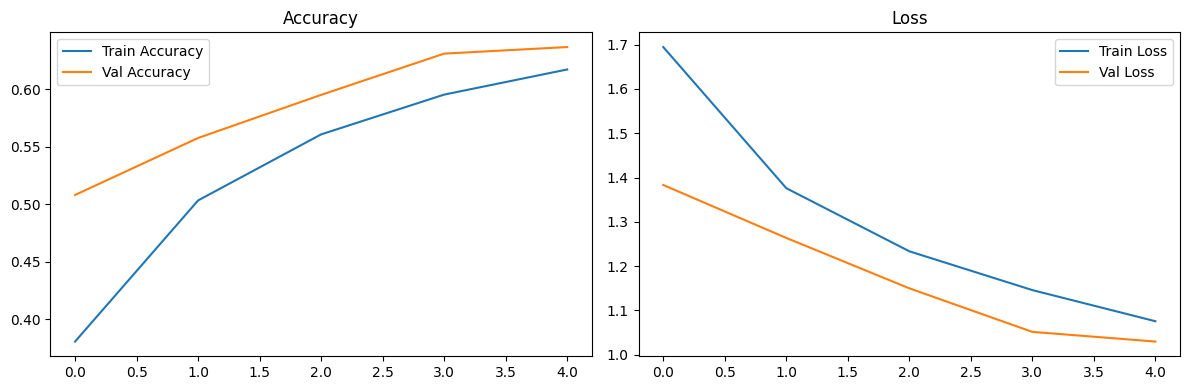

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


img_path = input("Enter the path of the image: ")


img = Image.open(img_path).resize((32, 32))  
img_array = image.img_to_array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0)  


prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]




Enter the path of the image: cat.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step



Predicted class: cat


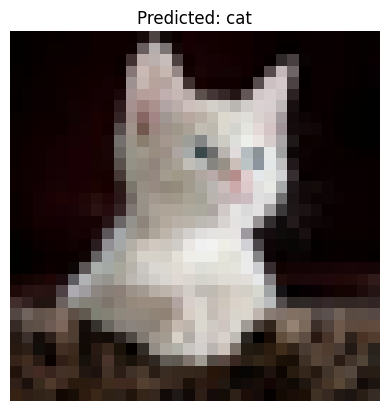

In [17]:
print(f"\nPredicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()